In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
import natsort
sns.set()

In [2]:
umap_wdbn_path = r'./umap_wdbn/'
umap_ae_wdbn_path = r'./umap_ae_wdbn/'
vanilla_ae_wdbn_path = r'./vanilla_ae_wdbn/'

umap_wdbn_files = natsort.natsorted(glob.glob(os.path.join(umap_wdbn_path , '*history.csv')))
umap_ae_wdbn_files = natsort.natsorted(glob.glob(os.path.join(umap_ae_wdbn_path , '*.csv')))
vanilla_ae_wdbn_files = natsort.natsorted(glob.glob(os.path.join(vanilla_ae_wdbn_path , '*history.csv')))

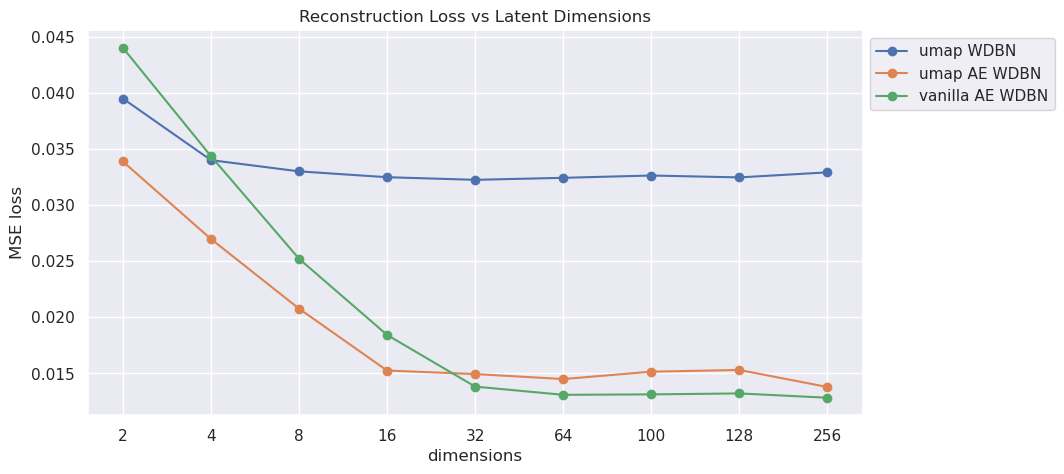

In [3]:
umap_wdbn_loss = [np.genfromtxt(i,delimiter=',')[-1][-1] for i in umap_wdbn_files]
umap_ae_wdbn_loss = [np.genfromtxt(i,delimiter=',')[1][-1] for i in umap_ae_wdbn_files]
vanilla_ae_wdbn_loss = [np.genfromtxt(i,delimiter=',')[-1][-1] for i in vanilla_ae_wdbn_files]

plt.figure(figsize=(10,5))

index = [1,3,4,5,7,8,9,10,11,12,13,15,16,17]

plt.plot(np.delete(umap_wdbn_loss,index),label='umap WDBN',marker='o')
plt.plot(np.delete(umap_ae_wdbn_loss,index),label='umap AE WDBN',marker='o')
plt.plot(np.delete(vanilla_ae_wdbn_loss,index),label='vanilla AE WDBN',marker='o')

plt.xticks(np.arange(9),['2','4','8','16','32','64','100','128','256'])

plt.title('Reconstruction Loss vs Latent Dimensions')
plt.ylabel('MSE loss')
plt.xlabel('dimensions')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [4]:
loss_weight_files = ['1e-08','1e-07','1e-06','1e-05','0.0001','0.001','0.01','0.1','1','10.0','100.0','1000.0',
                    '10000.0','100000.0','1000000.0','10000000.0','100000000.0']

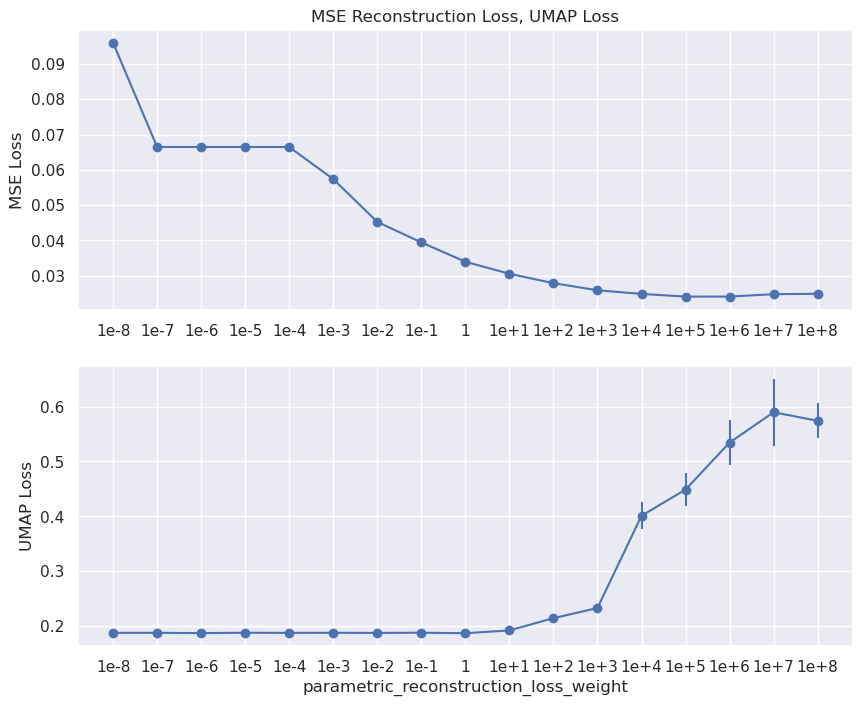

In [5]:
rec_loss_weight_path = r'./umap_ae_loss_weight_rec/umap_AE2D'
rec_loss_weight_path1 = r'./umap_ae_loss_weight_rec1/umap_AE2D'

rec_loss_weight = [np.genfromtxt(glob.glob(rec_loss_weight_path+i+'.csv')[0],delimiter=',') for i in loss_weight_files]
rec_loss_weight1 = [np.genfromtxt(glob.glob(rec_loss_weight_path1+i+'.csv')[0],delimiter=',') for i in loss_weight_files]

rec_loss_weight_mean = np.mean(np.array([rec_loss_weight,rec_loss_weight1]),axis=0)
rec_loss_weight_std = np.std(np.array([rec_loss_weight,rec_loss_weight1]),axis=0)

total_loss1 = [i[0][-1] for i in rec_loss_weight_mean]
mse_loss1 = [i[1][-1] for i in rec_loss_weight_mean]
umap_loss1 = [i[2][-1] for i in rec_loss_weight_mean]

total_std1 = [i[0][-1] for i in rec_loss_weight_std]
mse_std1 = [i[1][-1] for i in rec_loss_weight_std]
umap_std1 = [i[2][-1] for i in rec_loss_weight_std]

sns.set_style("darkgrid")
fig, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].errorbar(np.arange(17),mse_loss1,mse_std1,marker='o')
ax[1].errorbar(np.arange(17),umap_loss1,umap_std1,marker='o')
# ax[2].plot(total_loss,marker='o')

ax[0].set_ylabel('MSE Loss')
ax[1].set_ylabel('UMAP Loss')
# ax[2].set_ylabel('TOTAL Loss')

# ax[2].set_yscale('log')

ax[0].set_title('MSE Reconstruction Loss, UMAP Loss')
ax[1].set_xlabel('parametric_reconstruction_loss_weight')

ax[0].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])
ax[1].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])
# ax[2].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])

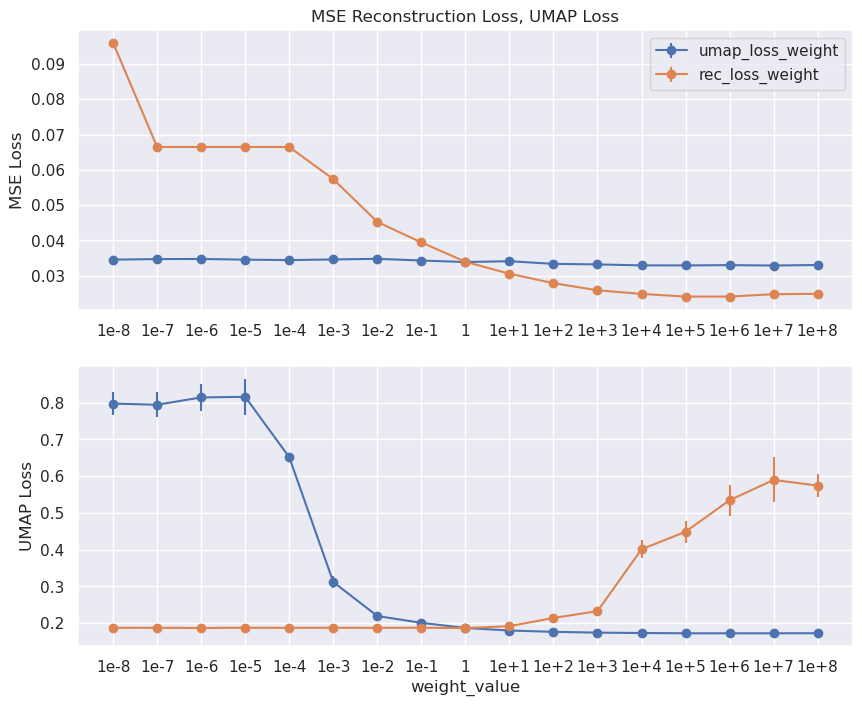

In [6]:
umap_loss_weight_path = r'./umap_ae_loss_weight_umap/umap_AE2D'
umap_loss_weight_path1 = r'./umap_ae_loss_weight_umap1/umap_AE2D'

umap_loss_weight = [np.genfromtxt(glob.glob(umap_loss_weight_path+i+'.csv')[0],delimiter=',') for i in loss_weight_files]
umap_loss_weight1 = [np.genfromtxt(glob.glob(umap_loss_weight_path1+i+'.csv')[0],delimiter=',') for i in loss_weight_files]

umap_loss_weight_mean = np.mean(np.array([umap_loss_weight,umap_loss_weight1]),axis=0)
umap_loss_weight_std = np.std(np.array([umap_loss_weight,umap_loss_weight1]),axis=0)

total_loss = [i[0][-1] for i in umap_loss_weight_mean]
mse_loss = [i[1][-1] for i in umap_loss_weight_mean]
umap_loss = [i[2][-1] for i in umap_loss_weight_mean]

total_std = [i[0][-1] for i in umap_loss_weight_std]
mse_std = [i[1][-1] for i in umap_loss_weight_std]
umap_std = [i[2][-1] for i in umap_loss_weight_std]

sns.set_style("darkgrid")
fig, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].errorbar(np.arange(17),mse_loss,mse_std,marker='o',label='umap_loss_weight')
ax[1].errorbar(np.arange(17),umap_loss,umap_std,marker='o',label='umap_loss_weight')
ax[0].errorbar(np.arange(17),mse_loss1,mse_std1,marker='o',label='rec_loss_weight')
ax[1].errorbar(np.arange(17),umap_loss1,umap_std1,marker='o',label='rec_loss_weight')
# ax[2].plot(total_loss,marker='o')
ax[0].legend()
ax[0].legend()

ax[0].set_ylabel('MSE Loss')
ax[1].set_ylabel('UMAP Loss')
# ax[2].set_ylabel('TOTAL Loss')

# ax[2].set_yscale('log')

ax[0].set_title('MSE Reconstruction Loss, UMAP Loss')
ax[1].set_xlabel('weight_value')

ax[0].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])
ax[1].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])
# ax[2].set_xticks(np.arange(17),['1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2','1e-1','1','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6','1e+7','1e+8'])

In [7]:
def plot_loss_weight(folder,title):
    results = []
    for j in range(1):
        for i in sorted(glob.glob(folder+str(j)+'*history.csv')):
            results.append(i)

    weight_00 = [np.genfromtxt(results[0],delimiter=',')]
    # ,np.genfromtxt(results[4],delimiter=','),np.genfromtxt(results[8],delimiter=',')]
    weight_01 = [np.genfromtxt(results[1],delimiter=',')]
    # ,np.genfromtxt(results[5],delimiter=','),np.genfromtxt(results[9],delimiter=',')]
    weight_10 = [np.genfromtxt(results[2],delimiter=',')]
    # ,np.genfromtxt(results[6],delimiter=','),np.genfromtxt(results[10],delimiter=',')]
    weight_11 = [np.genfromtxt(results[3],delimiter=',')]
    # ,np.genfromtxt(results[7],delimiter=','),np.genfromtxt(results[11],delimiter=',')]

    mse_loss_10_mean = np.mean(weight_10,axis=0)[1]
    mse_loss_11_mean = np.mean(weight_11,axis=0)[1]
    mse_loss_00_mean = np.mean(weight_00,axis=0)[1]
    mse_loss_01_mean = np.mean(weight_01,axis=0)[1]

    mse_loss_10_std = np.std( weight_10,axis=0)[1]
    mse_loss_11_std = np.std( weight_11,axis=0)[1]
    mse_loss_00_std = np.std( weight_00,axis=0)[1]
    mse_loss_01_std = np.std( weight_01,axis=0)[1]

    umap_loss_10_mean = np.mean( weight_10,axis=0)[2]
    umap_loss_11_mean = np.mean( weight_11,axis=0)[2]
    umap_loss_00_mean = np.mean( weight_00,axis=0)[2]
    umap_loss_01_mean = np.mean( weight_01,axis=0)[2]

    umap_loss_10_std = np.std( weight_10,axis=0)[2]
    umap_loss_11_std = np.std( weight_11,axis=0)[2]
    umap_loss_00_std = np.std( weight_00,axis=0)[2]
    umap_loss_01_std = np.std( weight_01,axis=0)[2]

    length = len(mse_loss_10_mean)

    sns.set_style("darkgrid")
    fig, ax = plt.subplots(2,1,figsize=(10, 8))
    ax[0].errorbar(np.arange(length),mse_loss_10_mean,mse_loss_10_std*30,marker='o',label='1->0')
    ax[0].errorbar(np.arange(length),mse_loss_00_mean,mse_loss_00_std,marker='.',label='0')
    ax[0].errorbar(np.arange(length),mse_loss_01_mean,mse_loss_01_std,marker='o',label='0->1')
    ax[0].errorbar(np.arange(length),mse_loss_11_mean,mse_loss_11_std,marker='.',label='1')

    ax[1].errorbar(np.arange(length),umap_loss_10_mean,umap_loss_10_std,marker='o',label='1->0')
    ax[1].errorbar(np.arange(length),umap_loss_00_mean,umap_loss_00_std,marker='.',label='0')
    ax[1].errorbar(np.arange(length),umap_loss_01_mean,umap_loss_01_std,marker='o',label='0->1')
    ax[1].errorbar(np.arange(length),umap_loss_11_mean,umap_loss_11_std,marker='.',label='1')


    ax[0].set_ylabel('MSE Loss')
    ax[1].set_ylabel('UMAP Loss')

    ax[0].set_title(title)
    ax[1].set_xlabel('epochs')

    ax[0].legend()
    ax[1].legend()

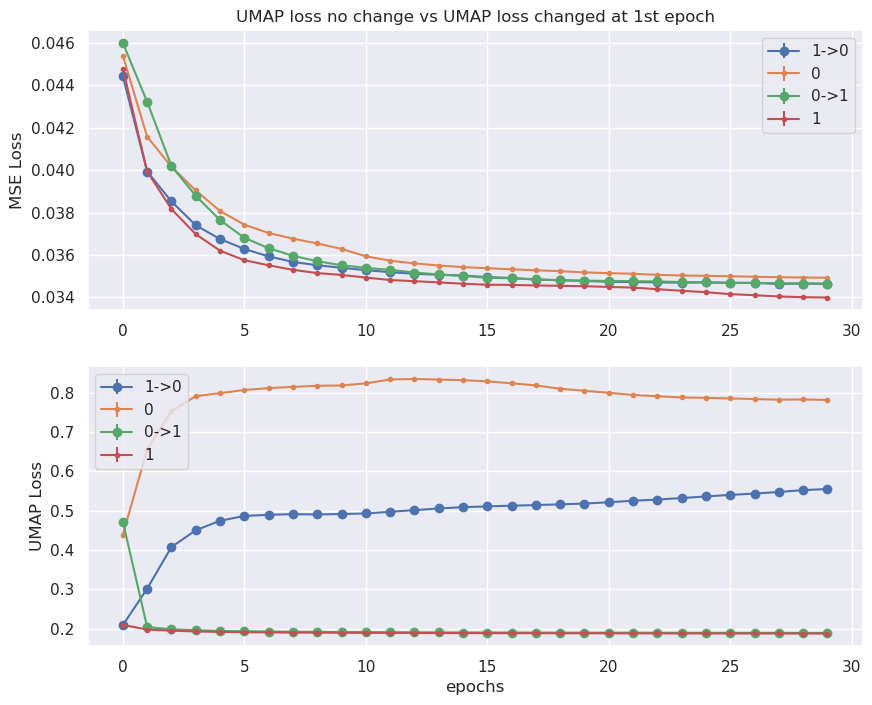

In [8]:
folder = r'./double_train_weight_umap3/1_28/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 1st epoch'
plot_loss_weight(folder,title)

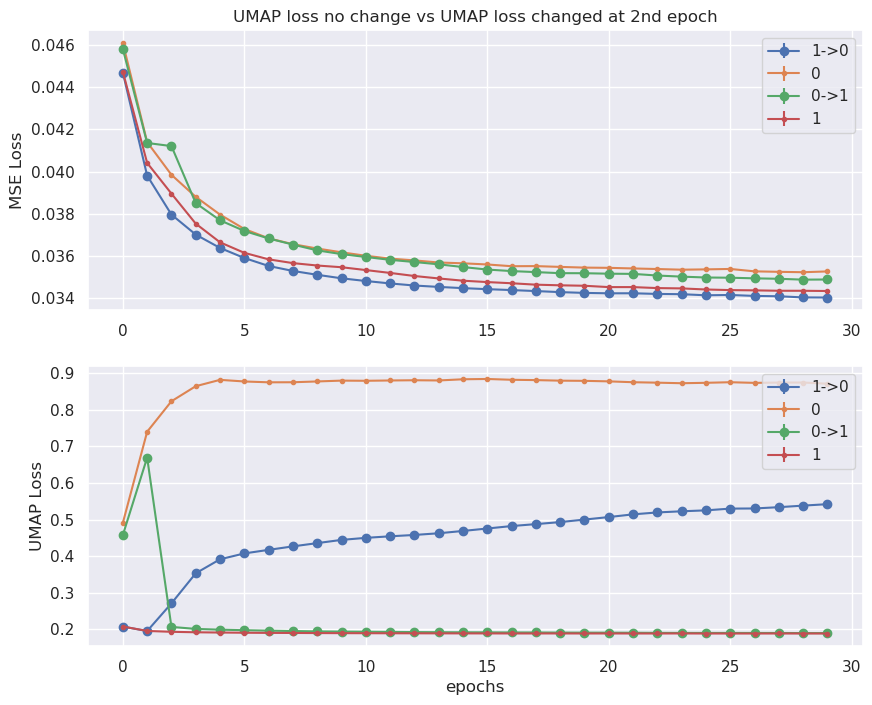

In [9]:
folder = r'./double_train_weight_umap3/2_27/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 2nd epoch'
plot_loss_weight(folder,title)

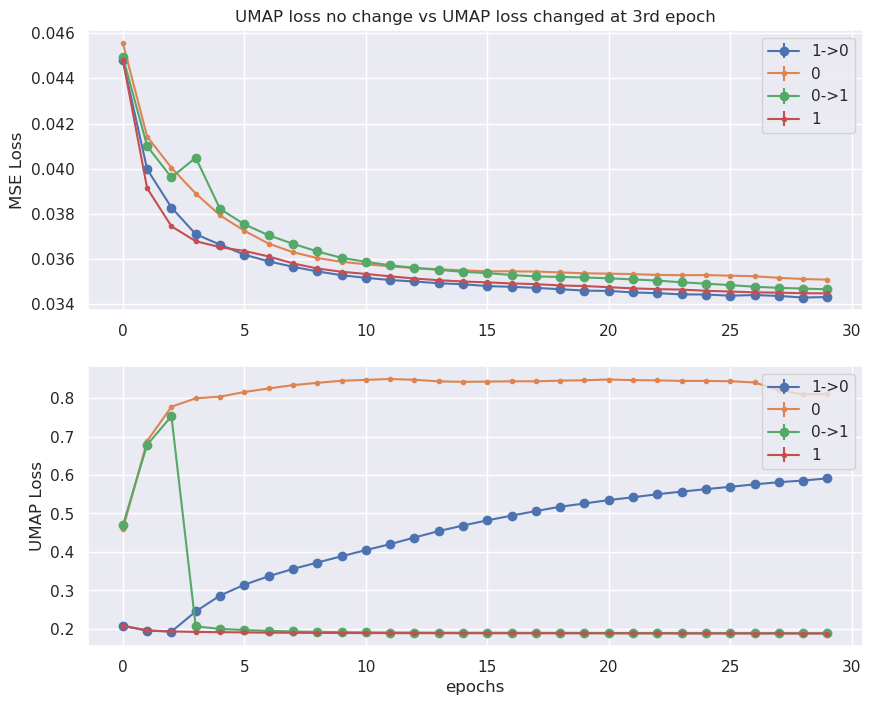

In [10]:
folder = r'./double_train_weight_umap3/3_26/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 3rd epoch'
plot_loss_weight(folder,title)

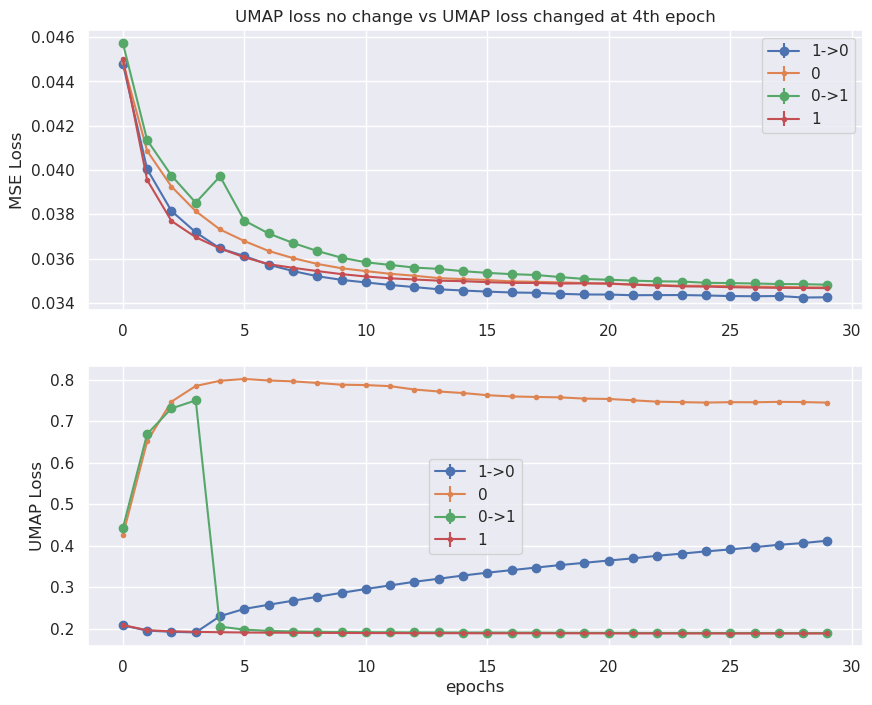

In [11]:
folder = r'./double_train_weight_umap4/4_25/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 4th epoch'
plot_loss_weight(folder,title)

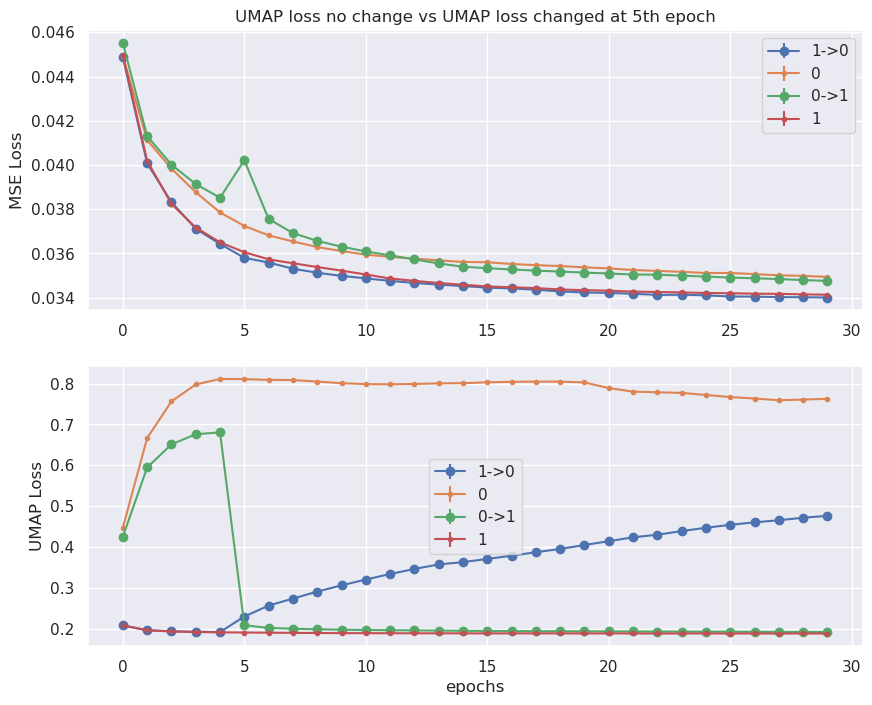

In [12]:
folder = r'./double_train_weight_umap4/5_24/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 5th epoch'
plot_loss_weight(folder,title)

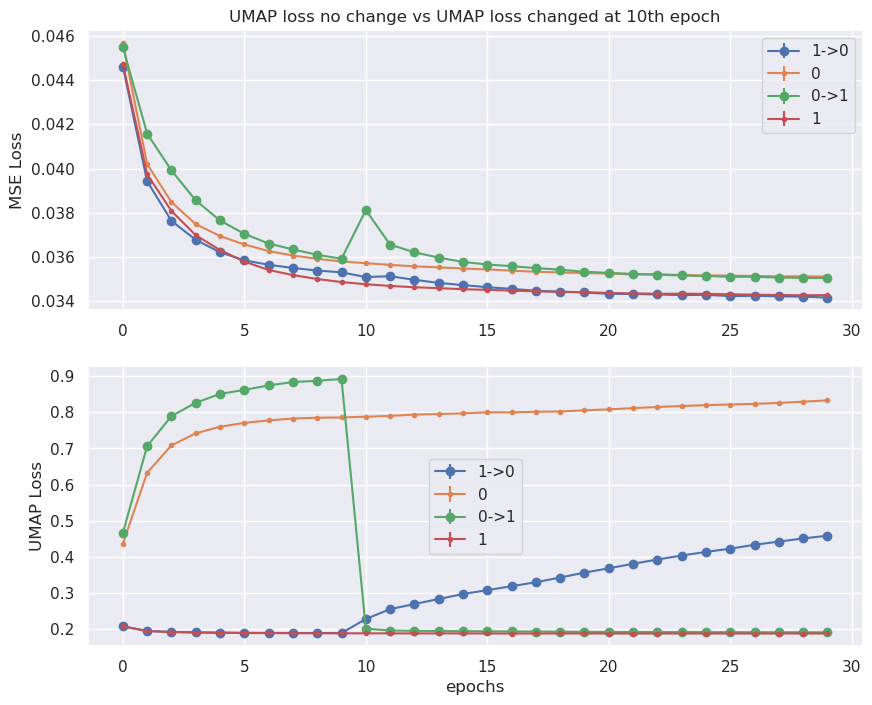

In [13]:
folder = r'./double_train_weight_umap4/10_19/umap_AE_run_'
title = 'UMAP loss no change vs UMAP loss changed at 10th epoch'
plot_loss_weight(folder,title)